### Telco Customer Churn - Exploratory Data Analysis (EDA)

# **1. Import Libraries & Load Data**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset

In [3]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Display first & few rows

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


# **2. Data Overview & Cleaning**
# Check data types, missing values, and summary statistics

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df["SeniorCitizen"].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

### Insights:
SeniorCitizen seems to contain in reality boolean values. Which means the Data doesn't represent a real numerical value.

# Convert 'SeniorCitizen' to categorical values

In [15]:
df["SeniorCitizen"] = df["SeniorCitizen"].map({0: "False", 1: "True"})

### Insights:
It seems TotalCharges' data is currently set as object when it should contain numberical values.

# Convert 'TotalCharges' to numeric (handling spaces)
### Insights:
When trying to convert I got an error indicating there were some empty string values.

In [17]:
(df["TotalCharges"] == " ").sum()

np.int64(11)

In [18]:
df[df["TotalCharges"] == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,False,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,False,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,False,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,False,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,False,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,False,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,False,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,False,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,False,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,False,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


# Convert empty strings in 'TotalCharges' to NaN

In [20]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", pd.NA)

# Convert 'TotalCharges' to numeric

In [22]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])

# Handling the NAN
### Insights: 
After checking the data available on the other columns where the NAN are present in Total Charges I can see that there is valuable information that I dont want to lose for further analysis later on. Which is why i'm rulling out droping the NAN in this case. 
I would like to better understand the type of info the Total Charges contains to see the best way to handle those NAN.

# Understanding Total Charges
I'm creating a new column with the expected total charges based on tenure and monthly charges. Then, checking for any discrepancies with the actual Total Charges. Finally, visualising all three for a better comparison. 

In [25]:
df["ExpectedTotalCharges"] = df["MonthlyCharges"] * df["tenure"]
df["ChargeDifference"] = df["TotalCharges"] - df["ExpectedTotalCharges"]
print(df[["TotalCharges", "ExpectedTotalCharges", "ChargeDifference"]].head(10))

   TotalCharges  ExpectedTotalCharges  ChargeDifference
0         29.85                 29.85              0.00
1       1889.50               1936.30            -46.80
2        108.15                107.70              0.45
3       1840.75               1903.50            -62.75
4        151.65                141.40             10.25
5        820.50                797.20             23.30
6       1949.40               1960.20            -10.80
7        301.90                297.50              4.40
8       3046.05               2934.40            111.65
9       3487.95               3481.30              6.65


### Insights: 

it seems in some case there is no difference or the difference is very small. But for now i'm just checking a small sample of the data which doesnt allow me to draw conclusions from it. There could be bigger differences or outliers that I would like to investigate further.

# Finding Outliers in Charge Difference

In [26]:
df["ChargeDifference"].describe()

count    7032.000000
mean        0.153193
std        67.255326
min      -370.850000
25%       -28.650000
50%         0.000000
75%        28.700000
max       373.250000
Name: ChargeDifference, dtype: float64

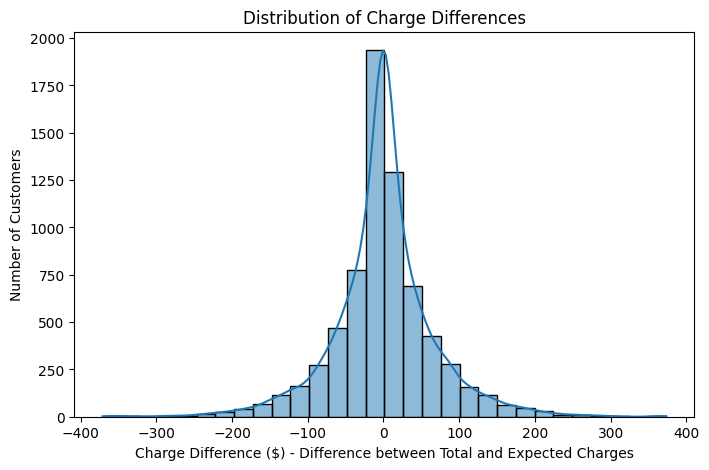

In [28]:
plt.figure(figsize=(8, 5))
sns.histplot(df["ChargeDifference"], bins=30, kde=True)
plt.title("Distribution of Charge Differences")
plt.xlabel("Charge Difference ($) - Difference between Total and Expected Charges")
plt.ylabel("Number of Customers")
plt.show()

### Insights: 

I can see that the mean is very close to 0 ($0.15), but the std is large ($67.25). Which suggest that some customers have significantly higher or lower total charges than expected.

I can observe some negative values (min = -$370.85) which means that for some customers TotalCharges is less than expected. Possible reasons could be due to discounts or refunds. 

On the other hand, positive values (max = $373.25) indicate that some customers paid more than expected, which could be due to extra fees or one-time purchases (e.g., equipment)

Another important remark is regarding the median (Q2), where the charge difference is $0, meaning half of the customers paid exactly what was expected.

All in all, I can conclude that most customers pay close to expected, but some outliers paid significantly more or less.

# Exploring the relation between Charge Difference & Contract Type

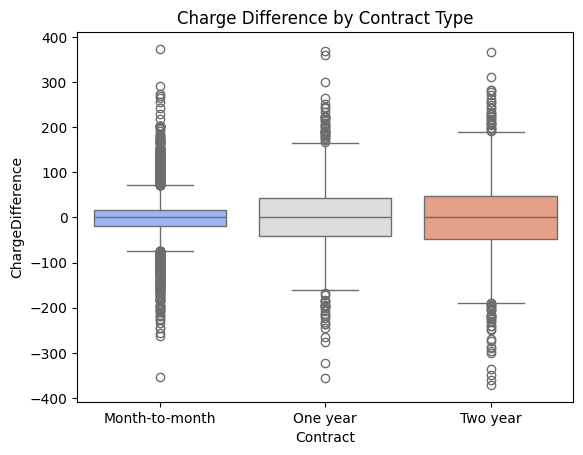

In [33]:
sns.boxplot(data=df, x="Contract", y="ChargeDifference", hue="Contract", palette="coolwarm")
plt.title("Charge Difference by Contract Type")
plt.show()


### Insights: 

All three contract types have a median of $0, which means that, on average, customers across all contract types are paying close to what was expected
Most month-to-month customers have charge differences close to 0, meaning their billing is more consistent compared to the other contract types.
The fact that outliers appear for all contract types suggests that extra charges or discounts are not specific to one contract type.

# Overall conclusion for Total Charges and NAN handling

TotalCharges is mostly predictable (median ≈ 0), but with some irregularities. So, I consider that imputing NAN TotalCharges using ExpectedTotalCharges is a reasonable approach, especially considering the total amount of customers with NAN is only 11. 

In [32]:
df["TotalCharges"] = df["TotalCharges"].fillna(df["ExpectedTotalCharges"])

# Checking if any other column has empty strings

In [34]:
(df == " ").sum()

customerID              0
gender                  0
SeniorCitizen           0
Partner                 0
Dependents              0
tenure                  0
PhoneService            0
MultipleLines           0
InternetService         0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
Contract                0
PaperlessBilling        0
PaymentMethod           0
MonthlyCharges          0
TotalCharges            0
Churn                   0
ExpectedTotalCharges    0
ChargeDifference        0
dtype: int64

# Checking Missing values per column

In [35]:
df.isnull().sum()

customerID               0
gender                   0
SeniorCitizen            0
Partner                  0
Dependents               0
tenure                   0
PhoneService             0
MultipleLines            0
InternetService          0
OnlineSecurity           0
OnlineBackup             0
DeviceProtection         0
TechSupport              0
StreamingTV              0
StreamingMovies          0
Contract                 0
PaperlessBilling         0
PaymentMethod            0
MonthlyCharges           0
TotalCharges             0
Churn                    0
ExpectedTotalCharges     0
ChargeDifference        11
dtype: int64

# Checking Duplicate rows

In [36]:
df.duplicated().sum()

np.int64(0)

# Remove 'customerID' column (not useful for analysis)

In [37]:
df.drop(columns=["customerID"], inplace=True)

# **3. Understanding Target Variable (Churn Distribution)**